# 1 - First Look to Dataset

In [1]:
import pandas as pd
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)

df_ = pd.read_csv("/kaggle/input/flo-data-20k/flo_data_20k.csv")

df = df_.copy()

In [2]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [3]:
df.shape

(19945, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [5]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


# 2 - Data Pre-Processing

New variables have been created for the total number of purchases and the money spent by customers who shop on both online and offline platforms.

In [7]:
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["customer_value_total"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

In [8]:
list1 = ["order_num_total_ever_online","order_num_total_ever_offline","order_num_total","customer_value_total_ever_online","customer_value_total_ever_offline","customer_value_total"]

df[list1].head()

,order_num_total_ever_online,order_num_total_ever_offline,order_num_total,customer_value_total_ever_online,customer_value_total_ever_offline,customer_value_total
0,4.0,1.0,5.0,799.38,139.99,939.37
1,19.0,2.0,21.0,1853.58,159.97,2013.55
2,3.0,2.0,5.0,395.35,189.97,585.32
3,1.0,1.0,2.0,81.98,39.99,121.97
4,1.0,1.0,2.0,159.99,49.99,209.98


The names of the variables expressing date are converted to date type.

In [9]:
date_col_list = [i for i in df.columns if "date" in i]

date_col_list

['first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline']

In [10]:
df[date_col_list] = df[date_col_list].apply(pd.to_datetime)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

# 2.1 - Some Insights

The distribution of the number of customers in the shopping channels according to the total number of products purchased and the total money spent was examined.

In [12]:
df.groupby("order_channel").agg({"master_id" : "count",
                                 "order_num_total" : "sum",
                                 "customer_value_total": "sum"}).head()

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


Top 10 highest paying customers

In [13]:
df.groupby("master_id").agg({"customer_value_total" : "sum"}).sort_values("customer_value_total", ascending = False).head(10)

,customer_value_total
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24


The top 10 customers with the most orders are listed.

In [14]:
df.groupby("master_id").agg({"order_num_total" : "sum"}).sort_values("order_num_total", ascending = False).head(10)

,order_num_total
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0


# 3 - Customer Segmentation with RFM Analysis

RFM analysis is a technique used for customer segmentation. It enables customers to be divided into groups based on their purchasing habits and to develop strategies specific to these groups.  

The RFM model is based on three quantitative factors:

**Recency:** How recently a customer has made a purchase.  
**Frequency:** How often a customer makes a purchase.  
**Monetary Value:** How much money a customer spends on purchases. 

https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

# 3.1 - RFM Metrics

The analysis date required to calculate the recency value. Analysis date was determined to be 2 days after the maximum date.  

Then, calculations of recency, frequency and monetary metrics were carried out.

In [15]:
df["last_order_date"].max()

analysis_date = dt.datetime(2021,6,1)

In [16]:
rfm = df.groupby("master_id").agg({"last_order_date": lambda x: (analysis_date - x),
                                     "order_num_total": lambda y: y,
                                     "customer_value_total": lambda z: z.sum()})

In [17]:
rfm.columns = ["recency", "frequency", "monetary"]

In [18]:
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33


# 3.2 - RF Scores

Recency, frequency and monetary values ​​were converted to scores ranging from 1 to 5 using the qcut method. Then, the recency score and frequency score were expressed as a single variable as RF_SCORE.

In [19]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

In [20]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54


# 3.3 - Segmentation

Segment definitions were created for the generated RF scores and the scores were converted into segments.

In [21]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [22]:
rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)

In [23]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54,champions


The recency, frequency and monetary averages of the segments were examined.

In [24]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean"])

,recency,frequency,monetary
,mean,mean,mean
segment,,,
about_to_sleep,114 days 00:45:34.510042604,2.406573,361.649373
at_Risk,242 days 07:53:45.380710660,4.470178,648.325038
cant_loose,235 days 03:49:08.743718592,10.716918,1481.652446
champions,17 days 03:24:45,8.965104,1410.708938
hibernating,247 days 10:13:52.543884092,2.391474,362.583299
loyal_customers,82 days 13:23:24.800000,8.356444,1216.257224
need_attention,113 days 00:53:35.880893300,3.739454,553.436638
new_customers,17 days 23:25:45.913818722,2.000000,344.049495


# 3.4 - Case

The id's of both female and loyal customers (champions, loyal_customers) want to be found. Below is a study on this.  
First, to be able to filter the categories, the interested_in_categories_12 column has been added to rfm using left join. Join operation was done according to master_id column. Then filtering was done.  
Among the loyal customers (champions, loyal_customers) shoppers from the female category were found and their ids were recorded.

In [25]:
rfm = pd.merge(rfm,df[["master_id","interested_in_categories_12"]],on="master_id", how='left')

In [26]:
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10 days,5.0,776.07,5,4,4,54,champions,"[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298 days,3.0,269.47,1,2,1,12,hibernating,"[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,213 days,4.0,722.69,2,3,4,23,at_Risk,"[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27 days,7.0,874.16,5,4,4,54,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20 days,7.0,1620.33,5,4,5,54,champions,"[ERKEK, AKTIFSPOR]"


In [27]:
new_customers_1 = rfm.loc[(rfm["segment"].eq("champions") | rfm["segment"].eq("loyal_customers")) & (rfm.interested_in_categories_12.str.contains("KADIN")), "master_id"]

new_customers_1 = new_customers_1.reset_index(drop=True)

In [28]:
new_customers_1.head()

0    000c1fe2-a8b7-11ea-8479-000d3a38a36f
1    003903e0-abce-11e9-a2fc-000d3a38a36f
2    004bec18-9f7a-11e9-a2fc-000d3a38a36f
3    00534fe4-a6b4-11e9-a2fc-000d3a38a36f
4    009293fe-1f3e-11ea-87bf-000d3a38a36f
Name: master_id, dtype: object

In [29]:
len(new_customers_1)

2487

# 4 - Customer Segmentation with K-Means

The purpose of K-means is to divide the observations into clusters according to their similarities to each other.  

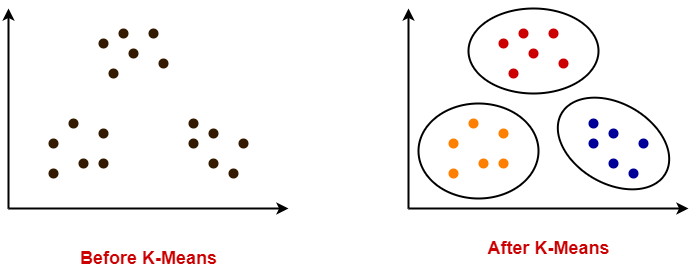

https://www.gatevidyalay.com/tag/k-means-clustering/

The variables that will be used while segmentation will be filtered. Firstly, the recency and tenure variables were created. Tenure represents the age of the customer.

In [30]:
df["recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[D]')

df["tenure"] = (df["last_order_date"]-df["first_order_date"]).astype('timedelta64[D]')

In [31]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,95.0,119.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,105.0,1469.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,186.0,366.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,135.0,11.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,86.0,582.0


In [32]:
model_df = df[["customer_value_total",
               "order_num_total",
               "order_num_total_ever_online",
               "order_num_total_ever_offline",
               "customer_value_total_ever_offline",
               "customer_value_total_ever_online",
               "recency",
               "tenure"]]

In [33]:
model_df.head()

,customer_value_total,order_num_total,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,939.37,5.0,4.0,1.0,139.99,799.38,95.0,119.0
1,2013.55,21.0,19.0,2.0,159.97,1853.58,105.0,1469.0
2,585.32,5.0,3.0,2.0,189.97,395.35,186.0,366.0
3,121.97,2.0,1.0,1.0,39.99,81.98,135.0,11.0
4,209.98,2.0,1.0,1.0,49.99,159.99,86.0,582.0


# 4.1 Scaling

In order to ensure that the model to be used approaches the variables under equal conditions, scaling is performed.  
MinMaxScaler is used. MinMaxScaler scales between two given values.

In [34]:
sc = MinMaxScaler((0, 1))

model_scaling = sc.fit_transform(model_df)

In [35]:
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)

In [36]:
model_df.head()

,customer_value_total,order_num_total,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.019503,0.015,0.015075,0.000000,0.007178,0.017395,0.254795,0.039222
1,0.042926,0.095,0.090452,0.009259,0.008281,0.040715,0.282192,0.484179
2,0.011782,0.015,0.010050,0.009259,0.009938,0.008458,0.504110,0.120633
3,0.001679,0.000,0.000000,0.000000,0.001656,0.001526,0.364384,0.003626
4,0.003598,0.000,0.000000,0.000000,0.002208,0.003252,0.230137,0.191826


# 4.2 - Determining the Optimum Number of Clusters

The SSE (the sum of the squared Euclidean distances of each point to its closest centroid.) value is calculated for all k values ​​in a specified range. These SSE values ​​are then plotted into a graph where the x-axis is k. The point where the elbow is determined as the optimum point.

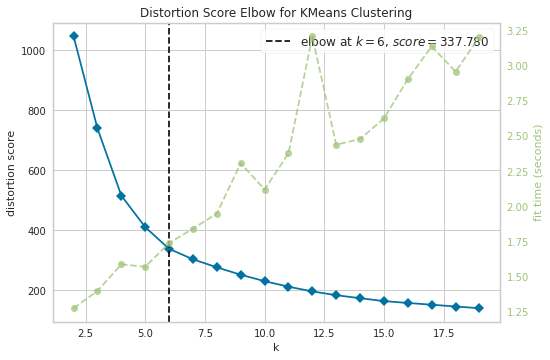

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
kmeans = KMeans()

elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

In [38]:
optimum_k = elbow.elbow_value_

optimum_k

6

# 4.3 - Modeling and Segmentation

The model was fit using the optimum number of clusters determined on the upper side. Then the labels are assigned to the variable named segments in order to be added to the dataframe.

In [39]:
k_means = KMeans(n_clusters = optimum_k, random_state= 55).fit(model_df)

In [40]:
segments = k_means.labels_

segments

array([1, 3, 5, ..., 2, 1, 0], dtype=int32)

In [41]:
np.unique(segments)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [42]:
k_means.n_clusters

6

In [43]:
df["segments_kmeans"] = segments

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,recency,tenure,segments_kmeans
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,95.0,119.0,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,105.0,1469.0,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,186.0,366.0,5
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,135.0,11.0,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,86.0,582.0,1


# 4.4 - Examination of Segments

In [44]:
df.groupby("segments_kmeans").agg({"order_num_total" : ["mean","min","max"],
                            "customer_value_total" : ["mean","min","max"],
                            "order_num_total_ever_online":["mean","min","max"],
                            "order_num_total_ever_offline":["mean","min","max"],
                            "customer_value_total_ever_offline":["mean","min","max"],
                            "customer_value_total_ever_online":["mean","min","max"],
                            "recency":["mean","min","max"],
                            "tenure":["mean","min","max","count"]})

order_num_total             customer_value_total         \
                           mean  min    max                 mean    min   
segments_kmeans                                                           
0                      3.799209  2.0   88.0           548.653233  53.47   
1                      4.398765  2.0   77.0           656.912876  49.98   
2                      4.987354  2.0   83.0           807.460365  65.91   
3                      9.740385  2.0  202.0          1335.709147  44.98   
4                      7.124874  2.0   61.0           898.586073  90.48   
5                      4.084511  2.0  111.0           620.247452  44.98   

                          order_num_total_ever_online              \
                      max                        mean  min    max   
segments_kmeans                                                     
0                 8572.23                    2.054941  1.0   20.0   
1                 8747.71                    2.446029  1.0   46.0   
2                31227.41                    3.009241  1.0   66.0   
3                45905.10                    7.571514  1.0  200.0   
4                 7953.47                    5.213494  1.0   55.0   
5                12103.15                    2.317236  1.0   28.0   

                order_num_total_ever_offline              \
                                        mean  min    max   
segments_kmeans                                            
0                                   1.744269  1.0   87.0   
1                                   1.952736  1.0   74.0   
2                                   1.978113  1.0   81.0   
3                                   2.168870  1.0   36.0   
4                                   1.911380  1.0   16.0   
5                                   1.767275  1.0  109.0   

                customer_value_total_ever_offline                   \
                                             mean    min       max   
segments_kmeans                                                      
0                                      217.102411  10.00   8432.25   
1                                      257.210373  11.98   7247.60   
2                                      271.778252  12.99  18119.14   
3                                      289.462728  12.99   3589.65   
4                                      250.333364  12.99   1811.54   
5                                      231.318960  10.49  10239.46   

                customer_value_total_ever_online                      recency  \
                                            mean    min       max        mean   
segments_kmeans                                                                 
0                                     331.550822  12.99   7665.28  319.959684   
1                                     399.702504  14.00   8667.73  110.606770   
2                                     535.682113  19.99  30688.47   31.042477   
3                                    1046.246418  19.99  45220.13   70.300481   
4                                     648.252709  14.99   7133.14  259.160121   
5                                     388.928492  18.74  12038.18  202.146930   

                                    tenure                        
                   min    max         mean     min     max count  
segments_kmeans                                                   
0                259.0  367.0   385.259289     0.0  1273.0  2530  
1                 66.0  160.0   501.491803     0.0  1287.0  4697  
2                  2.0   76.0   558.894780     0.0  1281.0  6168  
3                  2.0  173.0  1820.256010   932.0  3034.0  1664  
4                163.0  367.0  1727.541793  1001.0  2820.0   993  
5                154.0  263.0   456.815310     0.0  1279.0  3893

# 5 - Customer Segmentation with Hierarchical Clustering

Here, too, the aim is to divide the observations into subsets according to their similarities to each other. There are two approaches:  

**Agglomerative:** Going from the part to the whole. First, as many clusters as there are elements are created. Then, clusters that are close to each other in terms of distance merge and a new cluster is formed.  

**Divisive:** It goes from the whole to the part. It is the opposite of Agglomerative. At first all data is a single set. Other clusters are then created by spliting.  

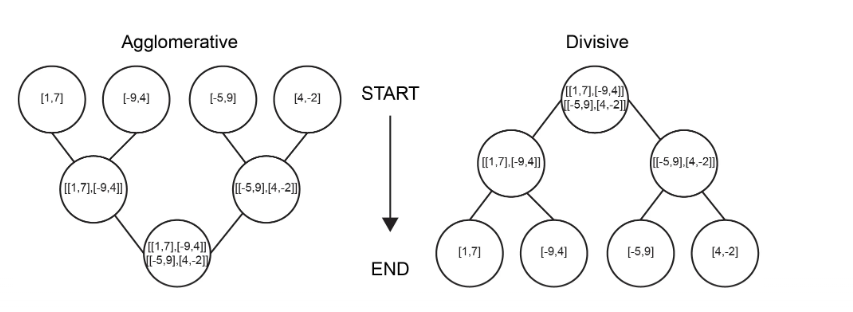

https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781789952292/2/ch02lvl1sec13/agglomerative-versus-divisive-clustering

In [45]:
model_df.head()

,customer_value_total,order_num_total,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.019503,0.015,0.015075,0.000000,0.007178,0.017395,0.254795,0.039222
1,0.042926,0.095,0.090452,0.009259,0.008281,0.040715,0.282192,0.484179
2,0.011782,0.015,0.010050,0.009259,0.009938,0.008458,0.504110,0.120633
3,0.001679,0.000,0.000000,0.000000,0.001656,0.001526,0.364384,0.003626
4,0.003598,0.000,0.000000,0.000000,0.002208,0.003252,0.230137,0.191826


# 5.1 - Determining the Optimum Number of Clusters

In [46]:
hc_complete = linkage(model_df, 'complete')

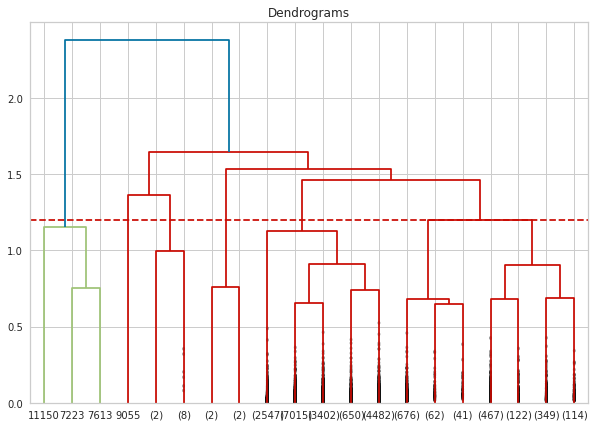

In [47]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = dendrogram(hc_complete,
           truncate_mode="lastp",
           p=20,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.show(block=True)

# 5.2 - Modeling and Segmentation

In [48]:
hc = AgglomerativeClustering(n_clusters=6)

In [49]:
segments = hc.fit_predict(model_df)

In [50]:
np.unique(segments)

array([0, 1, 2, 3, 4, 5])

In [51]:
df["segments_hc"] = segments

In [52]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,recency,tenure,segments_kmeans,segments_hc
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,95.0,119.0,1,1
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,105.0,1469.0,3,2
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,186.0,366.0,5,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,135.0,11.0,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,86.0,582.0,1,1


# 5.3 - Examination of Segments

In [53]:
df.groupby("segments_hc").agg({"order_num_total" : ["mean","min","max"],
                            "customer_value_total" : ["mean","min","max"],
                            "order_num_total_ever_online":["mean","min","max"],
                            "order_num_total_ever_offline":["mean","min","max"],
                            "customer_value_total_ever_offline":["mean","min","max"],
                            "customer_value_total_ever_online":["mean","min","max"],
                            "recency":["mean","min","max"],
                            "tenure":["mean","min","max","count"]})

order_num_total             customer_value_total                   \
                       mean  min    max                 mean    min       max   
segments_hc                                                                     
0                  7.007020  2.0   61.0           904.902049  67.99   7953.47   
1                  4.507724  2.0  111.0           683.350590  49.98  20706.34   
2                  9.244422  2.0  202.0          1295.212896  44.98  45905.10   
3                  3.836098  2.0   19.0           586.025249  44.98   4809.81   
4                  3.666212  2.0   47.0           538.597740  53.47   7745.27   
5                  4.764381  2.0   70.0           777.298819  65.91  18443.57   

            order_num_total_ever_online              \
                                   mean  min    max   
segments_hc                                           
0                              5.094448  1.0   55.0   
1                              2.426880  1.0   46.0   
2                              7.167343  1.0  200.0   
3                              2.134153  1.0   18.0   
4                              1.940427  1.0   16.0   
5                              2.878608  1.0   69.0   

            order_num_total_ever_offline              \
                                    mean  min    max   
segments_hc                                            
0                               1.912572  1.0   21.0   
1                               2.080844  1.0  109.0   
2                               2.077079  1.0   24.0   
3                               1.701945  1.0    9.0   
4                               1.725784  1.0   46.0   
5                               1.885773  1.0   18.0   

            customer_value_total_ever_offline                   \
                                         mean    min       max   
segments_hc                                                      
0                                  254.791359  12.99   3215.78   
1                                  274.588963  10.99  18119.14   
2                                  273.398185  12.99   2565.53   
3                                  222.803939  10.49   1671.41   
4                                  215.000591  10.00   3197.19   
5                                  260.925844  12.99   4325.77   

            customer_value_total_ever_online                      recency  \
                                        mean    min       max        mean   
segments_hc                                                                 
0                                 650.110689  14.99   7133.14  239.026803   
1                                 408.761627  14.00  12038.18  104.841744   
2                                1021.814711  19.99  45220.13   62.630832   
3                                 363.221310  18.74   3625.93  210.314645   
4                                 323.597149  12.99   7665.28  324.189632   
5                                 516.372974  23.99  17599.89   25.536950   

                                tenure                       
               min    max         mean    min     max count  
segments_hc                                                  
0            116.0  367.0  1556.475431  802.0  2864.0  1567  
1             27.0  336.0   495.979918    0.0  1300.0  5826  
2              2.0  224.0  1642.744422   43.0  3034.0  1972  
3            150.0  285.0   421.540618    0.0   972.0  3496  
4            249.0  367.0   343.309231    0.0  1040.0  2199  
5              2.0   86.0   512.487615    0.0  1434.0  4885